# ICESat-2's Nested Variables

This notebook ({nb-download}`download <IS2_data_variables.ipynb>`) illustrates the use of icepyx for managing lists of available and wanted ICESat-2 data variables.
The two use cases for variable management within your workflow are:
1. During the data access process, whether that's via order and download (e.g. via NSIDC DAAC) or remote (e.g. via the cloud).
2. When reading in data to a Python object (whether from local files or the cloud).

A given ICESat-2 product may have over 200 variable + path combinations.
icepyx includes a custom `Variables` module that is "aware" of the ATLAS sensor and how the ICESat-2 data products are stored.
The module can be accessed independently and can also be accessed as a component of a `Query` object or `Read` object.

This notebook illustrates in detail how the `Variables` module behaves. We use the module independently and also show how powerful it is directly in the icepyx workflow using a `Query` data access example.
Module usage using `Query` is analogous through an icepyx ICESat-2 `Read` object.
More detailed example workflows specifically for the [query](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html) and [read](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_read-in.html) tools within icepyx are available as separate Jupyter Notebooks.

Questions? Be sure to check out the FAQs throughout this notebook, indicated as italic headings.

### _Why do ICESat-2 products need a custom variable manager?_

_It can be confusing and cumbersome to comb through the 200+ variable and path combinations contained in ICESat-2 data products._
_An hdf5 file is built like a folder with files in it. Opening an ICESat-2 file can be like opening a new folder with over 200 files in it and manually searching for only ones you want!_

_The icepyx `Variables` module makes it easier for users to quickly find and extract the specific variables they would like to work with across multiple beams, keywords, and variables and provides reader-friendly formatting to browse variables._
_A future development goal for `icepyx` includes developing an interactive widget to further improve the user experience._
_For data read-in, additional tools are available to target specific beam characteristics (e.g. strong versus weak beams)._

Import packages, including icepyx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
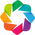

In [1]:
import icepyx as ipx
from pprint import pprint

## Creating or Accessing ICESat-2 Variables

There are three ways to create or access an ICESat-2 Variables object in icepyx:
1. Access via the `.order_vars` property of a Query object
2. Access via the `.vars` property of a Read object
3. Create a stand-alone ICESat-2 Variables object using a local file, cloud file, or a product name

An example of each of these is shown below.

### 1. Access `Variables` via the `.order_vars` property of a Query object

In [ ]:
region_a = ipx.Query('ATL06',[-55, 68, -48, 71],['2019-02-22','2019-02-28'], \
                           start_time='00:00:00', end_time='23:59:59')

In [ ]:
# Accessing Variables
region_a.order_vars

In [ ]:
# Showing the variable paths
region_a.order_vars.avail()

### 2. Access via the `.vars` property of a Read object

In [ ]:
path_root = '/full/path/to/your/data/'
reader = ipx.Read(path_root)

In [ ]:
# Accessing Variables
reader.vars

In [ ]:
# Showing the variable paths
# reader.vars.avail()

### 3. Create a stand-alone Variables object

You can also generate an independent Variables object. This can be done using either:
1. The filepath to a local or cloud file you'd like a variables list for
2. The product name (and optionally version) of a an ICESat-2 product

*Note: Cloud data access requires a valid Earthdata login; 
you will be prompted to log in if you are not already authenticated.*

Create a variables object from a filepath:

In [ ]:
filepath = '/full/path/to/your/data.h5'
v = ipx.Variables(path=filepath)

In [ ]:
# v.avail()

Create a variables object from a product. The version argument is optional.

In [ ]:
v = ipx.Variables(product='ATL03')

In [ ]:
# v.avail()

In [ ]:
v = ipx.Variables(product='ATL03', version='006')

In [ ]:
# v.avail()

Now that you know how to create or access Variables the remainder of this notebook showcases the functions availble for building and modifying variables lists. Remember, the example shown below uses a Query object, but the same methods are available if you are using a Read object or a Variables object.

## Interacting with ICESat-2 Data Variables

Each variables instance (which is actually an associated Variables class object) contains two variable list attributes.
One is the list of possible or available variables (`avail` attribute) and is unmutable, or unchangeable, as it is based on the input product specifications or files.
The other is the list of variables you'd like to actually have (in your downloaded file or data object) from all the potential options (`wanted` attribute) and is updateable.

Thus, your `avail` list depends on your data source and whether you are accessing or reading data, while your `wanted` list may change for each analysis you are working on or depending on what variables you want to see.

The variables parameter has methods to:
* get a list of all available variables, either available from the NSIDC or the file (`avail()` method).
* append new variables to the wanted list (`append()` method).
* remove variables from the wanted list (`remove()` method).

We'll showcase the use of all of these methods and attributes below using an `icepyx.Query` object.
Usage is identical in the case of an `icepyx.Read` object.
More detailed example workflows specifically for the [query](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html) and [read](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_read-in.html) tools within icepyx are available as separate Jupyter Notebooks.


Create a query object and log in to Earthdata

For this example, we'll be working with a land ice product (ATL06) for an area along West Greenland (Disko Bay).
A second option for an atmospheric product (ATL09) that uses profiles instead of the ground track (gt) categorization is also provided.

In [2]:
region_a = ipx.Query('ATL06',[-55, 68, -48, 71],['2019-02-22','2019-02-28'], \
                           start_time='00:00:00', end_time='23:59:59')

In [11]:
# Uncomment and run the code in this cell to use the second variable subsetting suite of examples,
# with the beam specifier containing "profile" instead of "gt#l"

region_a = ipx.Query('ATL09',[-55, 68, -48, 71],['2019-02-22','2019-02-28'], \
             start_time='00:00:00', end_time='23:59:59')

```{admonition} Important Authentication Update
Previously, icepyx required you to explicitly use the `.earthdata_login()` function to login. Running this function is deprecated and will result in an error, as icepyx will call the login function as needed. The user will still need to provide their credentials.
```

### ICESat-2 data variables

ICESat-2 data is natively stored in a nested file format called hdf5.
Much like a directory-file system on a computer, each variable (file) has a unique path through the heirarchy (directories) within the file.
Thus, some variables (e.g. `'latitude'`, `'longitude'`) have multiple paths (one for each of the six beams in most products).

#### Determine what variables are available
`region_a.order_vars.avail` will return a list of all valid path+variable strings.

In [ ]:
region_a.order_vars.avail()

To increase readability, you can use built in functions to show the 200+ variable + path combinations as a dictionary where the keys are variable names and the values are the paths to that variable.
`region_a.order_vars.parse_var_list(region_a.order_vars.avail())` will return a dictionary of variable:paths key:value pairs.

In [ ]:
region_a.order_vars.parse_var_list(region_a.order_vars.avail())

By passing the boolean `options=True` to the `avail` method, you can obtain lists of unique possible variable inputs (var_list inputs) and path subdirectory inputs (keyword_list and beam_list inputs) for your data product. These can be helpful for building your wanted variable list.

In [ ]:
region_a.order_vars.avail(options=True)

```{admonition} Remember
You can run these same methods no matter how you created or accessed your ICESat-2 Variables. So the methods in this section could be equivalently be accessed using a Read object, or by directly accessing a file on your computer:

```
```python
# Using a Read object
reader.vars.avail()
reader.vars.parse_var_list(reader.vars.avail())
reader.vars.avail(options=True)

# Using a file on your computer
v = Variables(path='/my/file.h5')
v.avail()
v.parse_var_list(v.avail())
v.avail(options=True)
```


### Building your wanted variable list

Now that you know which variables and path components are available, you need to build a list of the ones you'd like included.
There are several options for generating your initial list as well as modifying it, giving the user complete control.

The options for building your initial list are:
1. Use a default list for the product (not yet fully implemented across all products. Have a default variable list for your field/product? Submit a pull request or post it as an issue on [GitHub](https://github.com/icesat2py/icepyx)!)
2. Provide a list of variable names
3. Provide a list of profiles/beams or other path keywords, where "keywords" are simply the unique subdirectory names contained in the full variable paths of the product. A full list of available keywords for the product is displayed in the error message upon entering `keyword_list=['']` into the `append` function (see below for an example) or by running `region_a.order_vars.avail(options=True)`, as above.
4. Providing a list of full variable path names from the H5 root path. icepyx will ensure that you are submitting valid variable paths.

**Note: all products have a short list of "mandatory" variables/paths (containing spacecraft orientation and time information needed to convert the data's `delta_time` to a readable datetime) that are automatically added to any built list. If you have any recommendations for other variables that should always be included (e.g. uncertainty information), please let us know!**

Examples of using each method to build and modify your wanted variable list are below.

In [ ]:
region_a.order_vars.wanted

In [ ]:
region_a.order_vars.append(defaults=True)
pprint(region_a.order_vars.wanted)

The keywords available for this product are shown in the error message upon entering a blank keyword_list, as seen in the next cell.

In [ ]:
region_a.order_vars.append(keyword_list=[''])

### Modifying your wanted variable list

Generating and modifying your variable request list, which is stored in `region_a.order_vars.wanted`, is controlled by the `append` and `remove` functions that operate on `region_a.order_vars.wanted`. The input options to `append` are as follows (the full documentation for this function can be found by executing `help(region_a.order_vars.append)`).
* `defaults` (default False) - include the default variable list for your product (not yet fully implemented for all products; please submit your default variable list for inclusion!)
* `var_list` (default None) - list of variables (entered as strings)
* `beam_list` (default None) - list of beams/profiles (entered as strings)
* `keyword_list` (default None) - list of keywords (entered as strings); use `keyword_list=['']` to obtain a list of available keywords

Similarly, the options for `remove` are:
* `all` (default False) - reset `region_a.order_vars.wanted` to None
* `var_list` (as above)
* `beam_list` (as above)
* `keyword_list` (as above)

In [ ]:
region_a.order_vars.remove(all=True)
pprint(region_a.order_vars.wanted)

### Examples (Overview)
Below are a series of examples to show how you can use `append` and `remove` to modify your wanted variable list.
For clarity, `region_a.order_vars.wanted` is cleared at the start of many examples.
However, multiple `append` and `remove` commands can be called in succession to build your wanted variable list (see Examples 3+).

There are two example tracks.
The first is for land ice (ATL06) data that is separated into beams.
The second is for atmospheric data (ATL09) that is separated into profiles.
Both example tracks showcase the same functionality and are provided for users of both data types.

------------------
### Example Track 1 (Land Ice - run with ATL06 dataset)

#### Example 1.1: choose variables
Add all `latitude` and `longitude` variables across all six beam groups. Note that the additional required variables for time and spacecraft orientation are included by default.

In [ ]:
region_a.order_vars.append(var_list=['latitude','longitude'])
pprint(region_a.order_vars.wanted)

#### Example 1.2: specify beams and variable
Add `latitude` for only `gt1l` and `gt2l`

In [ ]:
region_a.order_vars.remove(all=True)
pprint(region_a.order_vars.wanted)

In [ ]:
var_dict = region_a.order_vars.append(beam_list=['gt1l', 'gt2l'], var_list=['latitude'])
pprint(region_a.order_vars.wanted)

#### Example 1.3: add/remove selected beams+variables
Add `latitude` for `gt3l` and remove it for `gt2l`

In [ ]:
region_a.order_vars.append(beam_list=['gt3l'],var_list=['latitude'])
region_a.order_vars.remove(beam_list=['gt2l'], var_list=['latitude'])
pprint(region_a.order_vars.wanted)

#### Example 1.4: `keyword_list`
Add `latitude` and `longitude` for all beams and with keyword `land_ice_segments`

In [ ]:
region_a.order_vars.append(var_list=['latitude', 'longitude'],keyword_list=['land_ice_segments'])
pprint(region_a.order_vars.wanted)

#### Example 1.5: target a specific variable + path
Remove `gt1r/land_ice_segments/longitude` (but keep `gt1r/land_ice_segments/latitude`)

In [ ]:
region_a.order_vars.remove(beam_list=['gt1r'], var_list=['longitude'], keyword_list=['land_ice_segments'])
pprint(region_a.order_vars.wanted)

#### Example 1.6: add variables not specific to beams/profiles
Add `rgt` under `orbit_info`.

In [ ]:
region_a.order_vars.append(keyword_list=['orbit_info'],var_list=['rgt'])
pprint(region_a.order_vars.wanted)

#### Example 1.7: add all variables+paths of a group
In addition to adding specific variables and paths, we can filter all variables with a specific keyword as well. Here, we add all variables under `orbit_info`. Note that paths already in `region_a.order_vars.wanted`, such as `'orbit_info/rgt'`, are not duplicated.

In [ ]:
region_a.order_vars.append(keyword_list=['orbit_info'])
pprint(region_a.order_vars.wanted)

#### Example 1.8: add all possible values for variables+paths
Append all `longitude` paths and all variables/paths with keyword `land_ice_segments`.

Similarly to what is shown in Example 4, if you submit only one `append` call as `region_a.order_vars.append(var_list=['longitude'], keyword_list=['land_ice_segments'])` rather than the two `append` calls shown below, you will only add the variable `longitude` and only paths containing `land_ice_segments`, not ALL paths for `longitude` and ANY variables with `land_ice_segments` in their path.

In [ ]:
region_a.order_vars.append(var_list=['longitude'])
region_a.order_vars.append(keyword_list=['land_ice_segments'])
pprint(region_a.order_vars.wanted)

#### Example 1.9: remove all variables+paths associated with a beam
Remove all paths for `gt1l` and `gt3r`

In [ ]:
region_a.order_vars.remove(beam_list=['gt1l','gt3r'])
pprint(region_a.order_vars.wanted)

#### Example 1.10: `path_list`
Add a specific list of variable paths.

In [10]:
# region_a.order_vars.remove(all=True)
path_list = ['gt1l/land_ice_segments/delta_time',
              'gt1l/land_ice_segments/geophysical/bsnow_h',
              'gt1l/land_ice_segments/geophysical/bsnow_conf',
              'gt1l/land_ice_segments/fit_statistics/h_mean',
              'gt1l/land_ice_segments/latitude',
              'gt1l/land_ice_segments/longitude',]
region_a.order_vars.append(path_list=path_list)
pprint(region_a.order_vars.wanted)

ValueError: too many values to unpack (expected 3)

#### Example 1.11: generate a default list for the rest of the tutorial
Generate a reasonable variable list prior to download

In [ ]:
region_a.order_vars.remove(all=True)
region_a.order_vars.append(defaults=True)
pprint(region_a.order_vars.wanted)

------------------
### Example Track 2 (Atmosphere - run with ATL09 dataset commented out at the start of the notebook)

#### Example 2.1: choose variables
Add all `latitude` and `longitude` variables

In [ ]:
region_a.order_vars.append(var_list=['latitude','longitude'])
pprint(region_a.order_vars.wanted)

#### Example 2.2: specify beams/profiles and variable
Add `latitude` for only `profile_1` and `profile_2`

In [ ]:
region_a.order_vars.remove(all=True)
pprint(region_a.order_vars.wanted)

In [ ]:
var_dict = region_a.order_vars.append(beam_list=['profile_1','profile_2'], var_list=['latitude'])
pprint(region_a.order_vars.wanted)

#### Example 2.3: add/remove selected beams+variables
Add `latitude` for `profile_3` and remove it for `profile_2`

In [ ]:
region_a.order_vars.append(beam_list=['profile_3'],var_list=['latitude'])
region_a.order_vars.remove(beam_list=['profile_2'], var_list=['latitude'])
pprint(region_a.order_vars.wanted)

#### Example 2.4: `keyword_list`
Add `latitude` for all profiles and with keyword `low_rate`

In [ ]:
region_a.order_vars.append(var_list=['latitude'],keyword_list=['low_rate'])
pprint(region_a.order_vars.wanted)

#### Example 2.5: target a specific variable + path
Remove `'profile_1/high_rate/latitude'` (but keep `'profile_3/high_rate/latitude'`)

In [ ]:
region_a.order_vars.remove(beam_list=['profile_1'], var_list=['latitude'], keyword_list=['high_rate'])
pprint(region_a.order_vars.wanted)

#### Example 2.6: add variables not specific to beams/profiles
Add `rgt` under `orbit_info`.

In [ ]:
region_a.order_vars.append(keyword_list=['orbit_info'],var_list=['rgt'])
pprint(region_a.order_vars.wanted)

#### Example 2.7: add all variables+paths of a group
In addition to adding specific variables and paths, we can filter all variables with a specific keyword as well. Here, we add all variables under `orbit_info`. Note that paths already in `region_a.order_vars.wanted`, such as `'orbit_info/rgt'`, are not duplicated.

In [ ]:
region_a.order_vars.append(keyword_list=['orbit_info'])
pprint(region_a.order_vars.wanted)

#### Example 2.8: add all possible values for variables+paths
Append all `longitude` paths and all variables/paths with keyword `high_rate`.
Simlarly to what is shown in Example 4, if you submit only one `append` call as `region_a.order_vars.append(var_list=['longitude'], keyword_list=['high_rate'])` rather than the two `append` calls shown below, you will only add the variable `longitude` and only paths containing `high_rate`, not ALL paths for `longitude` and ANY variables with `high_rate` in their path.

In [12]:
region_a.order_vars.append(var_list=['longitude'])
region_a.order_vars.append(keyword_list=['high_rate'])
pprint(region_a.order_vars.wanted)

{'aclr_true': ['profile_1/high_rate/aclr_true',
               'profile_2/high_rate/aclr_true',
               'profile_3/high_rate/aclr_true'],
 'apparent_surf_reflec': ['profile_1/high_rate/apparent_surf_reflec',
                          'profile_2/high_rate/apparent_surf_reflec',
                          'profile_3/high_rate/apparent_surf_reflec'],
 'asr_cloud_probability': ['profile_1/high_rate/asr_cloud_probability',
                           'profile_2/high_rate/asr_cloud_probability',
                           'profile_3/high_rate/asr_cloud_probability'],
 'backg_c': ['profile_1/high_rate/backg_c',
             'profile_2/high_rate/backg_c',
             'profile_3/high_rate/backg_c'],
 'backg_theoret': ['profile_1/high_rate/backg_theoret',
                   'profile_2/high_rate/backg_theoret',
                   'profile_3/high_rate/backg_theoret'],
 'beam_azimuth': ['profile_1/high_rate/beam_azimuth',
                  'profile_2/high_rate/beam_azimuth',
                 

#### Example 2.9: remove all variables+paths associated with a profile
Remove all paths for `profile_1` and `profile_3`

In [ ]:
region_a.order_vars.remove(beam_list=['profile_1','profile_3'])
pprint(region_a.order_vars.wanted)

#### Example 2.10: `path_list`
Add a specific list of variable paths.

In [ ]:
region_a.order_vars.remove(all=True)
path_list = ['profile_2/high_rate/beam_elevation',
              'profile_2/high_rate/solar_elevation',
              'profile_2/high_rate/surface_conf',
              'profile_2/high_rate/surface_height'
            ]
region_a.order_vars.append(path_list=path_list)
pprint(region_a.order_vars.wanted)

#### Example 2.11: generate a default list for the rest of the tutorial
Generate a reasonable variable list prior to download

In [ ]:
region_a.order_vars.remove(all=True)
region_a.order_vars.append(defaults=True)
pprint(region_a.order_vars.wanted)

### Using your wanted variable list

Now that you have your wanted variables list, you need to use it within your icepyx object (`Query` or `Read`) will automatically use it. 

#### With a `Query` object
In order to have your wanted variable list included with your order, you must pass it as a keyword argument to the `subsetparams()` attribute or the `order_granules()` or `download_granules()` (which calls `order_granules` under the hood if you have not already placed your order) functions.

In [ ]:
region_a.subsetparams(Coverage=region_a.order_vars.wanted)

Or, you can put the `Coverage` parameter directly into `order_granules`:
`region_a.order_granules(Coverage=region_a.order_vars.wanted)`

However, then you cannot view your subset parameters (`region_a.subsetparams`) prior to submitting your order.

In [ ]:
region_a.order_granules()# <-- you do not need to include the 'Coverage' kwarg to
                             # order if you have already included it in a call to subsetparams

In [ ]:
region_a.download_granules('/home/jovyan/icepyx/dev-notebooks/vardata') # <-- you do not need to include the 'Coverage' kwarg to
                             # download if you have already submitted it with your order

#### With a `Read` object
Calling the `load()` method on your `Read` object will automatically look for your wanted variable list and use it.
Please see the [read-in example Jupyter Notebook](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_read-in.html) for a complete example of this usage.


#### With a local filepath

One of the benefits of using a local filepath in variables is that it allows you to easily inspect the variables that are available in your file. Once you have a variable of interest from the `avail` list, you could read that variable in with another library, such as xarray. The example below demonstrates this assuming an ATL06 ICESat-2 file.

In [ ]:
filepath = '/full/path/to/my/ATL06_file.h5'
v = ipx.Variables(path=filepath)
v.avail()
# Browse paths and decide you need `gt1l/land_ice_segments/`

In [ ]:
import xarray as xr

xr.open_dataset(filepath, group='gt1l/land_ice_segments/', engine='h5netcdf')

You'll notice in this workflow you are limited to viewing data only within a particular group. Icepyx also provides functionality for merging variables within or even across files. See the [read-in example Jupyter Notebook](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_read-in.html) for more details about these features of icepyx.

#### Credits
* based on the subsetting notebook by: Jessica Scheick and Zheng Liu